# Figures S1 and S2 - test how Fig2a and Fig2c depend on spatial and temporal resolution
Anna Mackie, 2023

Produces:
- Figure S1, R_lw(w) and A(w) with spatial averaging of a)-b) 24 x 24 km; c)-d) 48 x 48 km and e)-f) 96 km x 96km. Temporal averaging of 24hours.

- Figure S2,  R_lw(w) and A(w) with temporal averaging of a)-b) 6 hours; c)-d) 12 hours and e)-f) 24 hours. Spatial averaging of 96 x 96km. 

In [8]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.lines as mlines
from scipy import stats
from scipy.interpolate import UnivariateSpline
import sys
sys.path.append('../')
import funcs
mpl.rcParams['font.size'] = 16

models = ['CM1',  'dam','ICON_LEM_CRM', 'ICON_NWP_CRM', 'MESONH', 'SAM_CRM', 'SCALE', 'UCLA-CRM',
          'UKMOi-vn11.0-CASIM', 'UKMOi-vn11.0-RA1-T', 'UKMOi-vn11.0-RA1-T-nocloud', 'WRF_COL_CRM']
m = len(models)

day = 0

# limits of vertical velocity, common across models
pl = 0.22 # pos limit
nlim= -0.07 # neg limit
bs = 0.001 # bin size

bins = np.arange(nlim, pl, bs) #creates bins
b = len(bins)
print('no of vertical velocity bins: ', b)
mnbin = [] # create array of the mid-point between bin limits for plotting
for i in range(1,b):
    mnbin = np.append(mnbin, np.mean([bins[i-1], bins[i]])*100)

pLev = 500
lets = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)', 'i)' 'j)' 'k)', 'l)']    

no of vertical velocity bins:  291


In [5]:
def calcIQR(arr, axis = 0):
    q75, q25 = np.nanpercentile(arr, [75 ,25], axis = axis)
    return q75, q25

def calcRange(arr, axis = 0):
    mn, mx = np.nanmin(arr, axis = axis), np.nanmax(arr, axis = axis)
    return mn, mx

# Spatial averaging dependency of Fig2

In [13]:
resolutions = ['8', '16', '32']
resolutions_km = ['24', '48', '96']

# using the lower temperature difference 
temp = 'large295'
temp2 = 'large300'

#create empty arrays for LW, A functions of all the models at the three resolutions
LW_arr, A_arr = np.empty((3, m, len(mnbin))),np.empty((3, m, len(mnbin))),

for i in range(3):
    resolution= resolutions[i]
    print(resolution)
    for k in range(m):
        model = models[k]
        #print(model)
        dp = '/home/users/arm33/RCEMIP/allMod/resolution_npys/'  
        
        #temp1
        wa5001 = np.load(dp + model + '_' + resolution + '_' + 'wa500_3D_25days.npy', allow_pickle = True)[0,]  
        lwcrf1 = np.load(dp + model + '_' + resolution + '_' + 'lwcrf_25days.npy', allow_pickle = True)[0,] 

        if model == 'MESONH' or model == 'SCALE' or model =='WRF_COL_CRM':
                lwcrf1 = -lwcrf1
        dig1 = np.digitize(wa5001, bins)
        A1 = funcs.createA(dig1, b)
        LW1 = funcs.createR(lwcrf1, dig1, b)
        LW1 = funcs.rpTrailingZeros(A1, LW1)
       
        LW_arr[i,k,] = LW1
        A_arr[i,k,] = A1
    
print(np.shape(LW_arr))

8


/home/users/arm33/RCEMIP/allMod/../funcs.py:120: RuntimeWarning: Mean of empty slice
  arrbin = [np.nanmean(arr[dig==i]) for i in range(1,b)]


16
32
(3, 12, 290)


/opt/jaspy/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1584: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/tmp/ipykernel_547/2593055694.py:6: RuntimeWarning: All-NaN slice encountered
  mn, mx = np.nanmin(arr, axis = axis), np.nanmax(arr, axis = axis)
/tmp/ipykernel_547/3244815990.py:30: RuntimeWarning: Mean of empty slice
  ax1.plot(mnbin, np.nanmean(LW, axis = 0), 'k-')


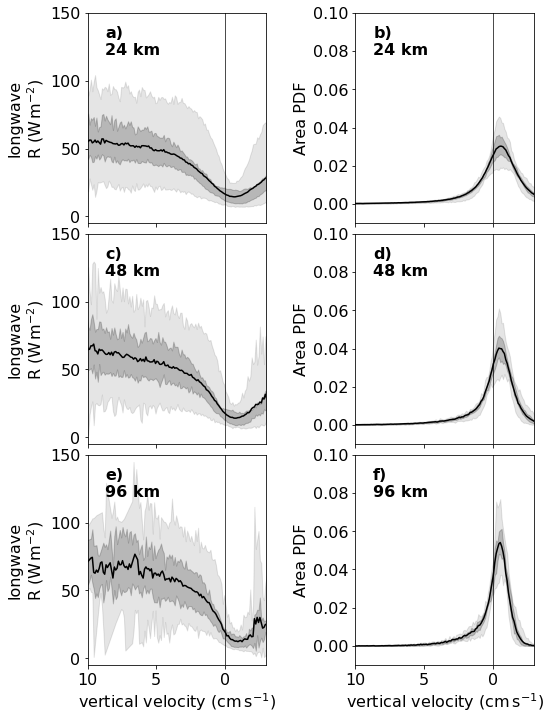

In [14]:
# plot figure: light shading for full range, light shading interquartile range, solid black line for mean 
# and teal line for example model SAM_CRM

fig, axes = plt.subplots(3,2)
xlim = [10, -3]

deltaT = 5 # temperature difference between experiments

LWylim = [-5, 150]
Aylim = [-0.01, 0.1]

for i in range(3):
    resolution = resolutions[i]
    ax1 = axes[i,0] # LW CRE axis
    ax2 = axes[i,1] # Area pdf axis
    LW = LW_arr[i,]
    # plot shading
    q75, q25 = calcIQR(LW, axis = 0)
    ax1.fill_between(mnbin, q75, q25, color = 'k', alpha = 0.2)
    mn,mx = calcRange(LW, axis = 0)
    ax1.fill_between(mnbin, mn, mx, color = 'k', alpha = 0.1)
    
    q75, q25 = calcIQR(A_arr[i,], axis = 0)
    ax2.fill_between(mnbin, q75, q25, color = 'k', alpha = 0.2)
    mn,mx = calcRange(A_arr[i,], axis = 0)
    ax2.fill_between(mnbin, mn, mx, color = 'k', alpha = 0.1)
    
    # plot multimodel mean
    ax1.plot([0,0], [LWylim[0], LWylim[1]], 'k-', linewidth = 1, alpha = 0.7) 
    ax1.plot(mnbin, np.nanmean(LW, axis = 0), 'k-')
    ax1.set_ylim(LWylim)
    ax1.set_ylabel('longwave\nR (W$\,$m$^{-2}$)')
    ax1.text(0.1, 0.8, lets[2*i] + '\n' + resolutions_km[i] + ' km' , fontweight = 'bold',transform=ax1.transAxes)
    #ax1.text(0.07, 0.7, 'resolution = ' + resolution + ' km',transform=ax1.transAxes)
    
    ax2.plot([0,0], [Aylim[0], Aylim[1]], 'k-', linewidth = 1, alpha = 0.7)
    ax2.plot(mnbin, np.nanmean(A_arr[i], axis = 0), 'k-')
    ax2.set_ylim(Aylim)
    ax2.set_ylabel('Area PDF')
    ax2.text(0.1, 0.8, lets[2*i+1] + '\n' + resolutions_km[i] + ' km', fontweight = 'bold',transform=ax2.transAxes)
    #ax2.text(0.07, 0.7, 'resolution = ' + resolution + ' km',transform=ax2.transAxes)

        

plt.setp(axes,xlim =xlim)
plt.setp(axes[:2,:], xticklabels = [])
plt.setp(axes[-1,:], xlabel = 'vertical velocity (cm$\,$s$^{-1}$)')
plt.subplots_adjust(wspace = 0.5, hspace = 0.05)
fig.set_size_inches(8,12)
fig.savefig('revised_plots/FigS1.pdf', bbox_inches = 'tight')



# Temporal averaging dependency of Fig2

In [10]:
resolutions = ['6', '12', '24']

# using the lower temperature difference 
temp = 'large295'
temp2 = 'large300'

#create empty arrays for LW, A functions of all the models at the three resolutions
LW_arr, A_arr = np.empty((3, m, len(mnbin))),np.empty((3, m, len(mnbin))),

for i in range(3):
    resolution= resolutions[i]
    print(resolution)
    for k in range(m):
        model = models[k]
        #print(model)
        dp = '/home/users/arm33/RCEMIP/allMod/time_resolution_npys/'  
        
        #temp1
        wa5001 = np.load(dp + model + '_32_wa500_3D_' + resolution + 'hours.npy', allow_pickle = True)[0,]  
        lwcrf1 = np.load(dp + model + '_32_lwcrf_' + resolution + 'hours.npy', allow_pickle = True)[0,] 

        if  model =='WRF_COL_CRM':
                lwcrf1 = -lwcrf1
        dig1 = np.digitize(wa5001, bins)
        A1 = funcs.createA(dig1, b)
        LW1 = funcs.createR(lwcrf1, dig1, b)
        LW1 = funcs.rpTrailingZeros(A1, LW1)
       
        LW_arr[i,k,] = LW1
        A_arr[i,k,] = A1
    
print(np.shape(LW_arr))

6


/home/users/arm33/RCEMIP/allMod/../funcs.py:120: RuntimeWarning: Mean of empty slice
  arrbin = [np.nanmean(arr[dig==i]) for i in range(1,b)]


12
24
(3, 12, 290)


/opt/jaspy/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1584: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/tmp/ipykernel_547/2593055694.py:6: RuntimeWarning: All-NaN slice encountered
  mn, mx = np.nanmin(arr, axis = axis), np.nanmax(arr, axis = axis)
/tmp/ipykernel_547/350711736.py:30: RuntimeWarning: Mean of empty slice
  ax1.plot(mnbin, np.nanmean(LW, axis = 0), 'k-')


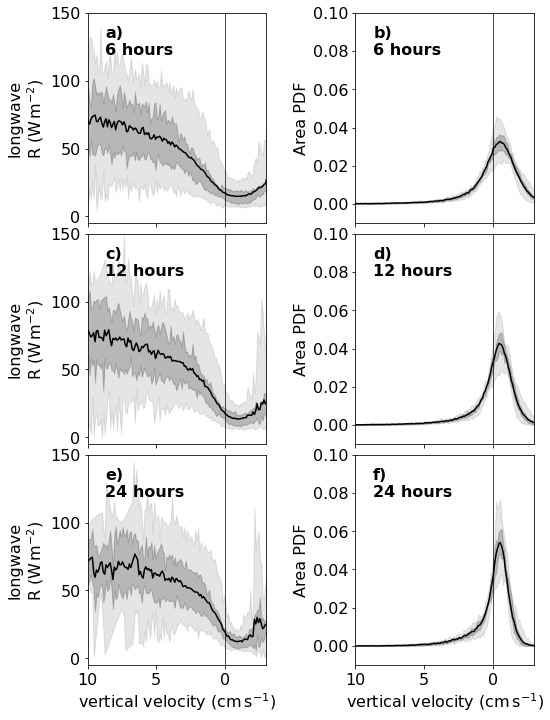

In [12]:
# plot figure: light shading for full range, light shading interquartile range, solid black line for mean 
# and teal line for example model SAM_CRM

fig, axes = plt.subplots(3,2)
xlim = [10, -3]

deltaT = 5 # temperature difference between experiments

LWylim = [-5, 150]
Aylim = [-0.01, 0.1]

for i in range(3):
    resolution = resolutions[i]
    ax1 = axes[i,0] # LW CRE axis
    ax2 = axes[i,1] # Area pdf axis
    LW = LW_arr[i,]
    # plot shading
    q75, q25 = calcIQR(LW, axis = 0)
    ax1.fill_between(mnbin, q75, q25, color = 'k', alpha = 0.2)
    mn,mx = calcRange(LW, axis = 0)
    ax1.fill_between(mnbin, mn, mx, color = 'k', alpha = 0.1)
    
    q75, q25 = calcIQR(A_arr[i,], axis = 0)
    ax2.fill_between(mnbin, q75, q25, color = 'k', alpha = 0.2)
    mn,mx = calcRange(A_arr[i,], axis = 0)
    ax2.fill_between(mnbin, mn, mx, color = 'k', alpha = 0.1)
    
    # plot multimodel mean
    ax1.plot([0,0], [LWylim[0], LWylim[1]], 'k-', linewidth = 1, alpha = 0.7) 
    ax1.plot(mnbin, np.nanmean(LW, axis = 0), 'k-')
    ax1.set_ylim(LWylim)
    ax1.set_ylabel('longwave\nR (W$\,$m$^{-2}$)')
    ax1.text(0.1, 0.8, lets[2*i] + '\n' + resolution + ' hours' , fontweight = 'bold',transform=ax1.transAxes)
    #ax1.text(0.07, 0.7, 'resolution = ' + resolution + ' km',transform=ax1.transAxes)
    
    ax2.plot([0,0], [Aylim[0], Aylim[1]], 'k-', linewidth = 1, alpha = 0.7)
    ax2.plot(mnbin, np.nanmean(A_arr[i], axis = 0), 'k-')
    ax2.set_ylim(Aylim)
    ax2.set_ylabel('Area PDF')
    ax2.text(0.1, 0.8, lets[2*i+1] + '\n' + resolution + ' hours', fontweight = 'bold',transform=ax2.transAxes)
    #ax2.text(0.07, 0.7, 'resolution = ' + resolution + ' km',transform=ax2.transAxes)

        

plt.setp(axes,xlim =xlim)
plt.setp(axes[:2,:], xticklabels = [])
plt.setp(axes[-1,:], xlabel = 'vertical velocity (cm$\,$s$^{-1}$)')
plt.subplots_adjust(wspace = 0.5, hspace = 0.05)
fig.set_size_inches(8,12)
fig.savefig('revised_plots/FigS2.pdf', bbox_inches = 'tight')

